# Current Health Expenditure & Life Expectancy Analysis

This project is an analysis of the Current Health Expenditure Per Capita in US$ and Life Expectancy across multiple countries.

In [1016]:
# import dependencies
import pandas as pd
import numpy as np

In [1017]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.graph_objects as go

## Cleaning and Exploring Data

In [1019]:
# read in current health expenditure data set
che = pd.read_csv("data/current_health_expenditure.csv")
che.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,GHED_CHE_pc_US_SHA2011,Current health expenditure (CHE) per capita in...,numeric,AMR,Americas,Country,CUB,Cuba,Year,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EN,2023-12-05T08:00:00.000Z
1,GHED_CHE_pc_US_SHA2011,Current health expenditure (CHE) per capita in...,numeric,AFR,Africa,Country,GHA,Ghana,Year,2021,...,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN,EN,2023-12-05T08:00:00.000Z
2,GHED_CHE_pc_US_SHA2011,Current health expenditure (CHE) per capita in...,numeric,SEAR,South-East Asia,Country,MDV,Maldives,Year,2021,...,NaN,NaN,NaN,NaN,NaN,1038.67,NaN,NaN,EN,2023-12-05T08:00:00.000Z
3,GHED_CHE_pc_US_SHA2011,Current health expenditure (CHE) per capita in...,numeric,EUR,Europe,Country,BGR,Bulgaria,Year,2021,...,NaN,NaN,NaN,NaN,NaN,1040.02,NaN,NaN,EN,2023-12-05T08:00:00.000Z
4,GHED_CHE_pc_US_SHA2011,Current health expenditure (CHE) per capita in...,numeric,AMR,Americas,Country,ARG,Argentina,Year,2021,...,NaN,NaN,NaN,NaN,NaN,1044.77,NaN,NaN,EN,2023-12-05T08:00:00.000Z


In [1020]:
print(che.isnull().sum())

IndicatorCode                    0
Indicator                        0
ValueType                        0
ParentLocationCode               0
ParentLocation                   0
Location type                    0
SpatialDimValueCode              0
Location                         0
Period type                      0
Period                           0
IsLatestYear                     0
Dim1 type                     4153
Dim1                          4153
Dim1ValueCode                 4153
Dim2 type                     4153
Dim2                          4153
Dim2ValueCode                 4153
Dim3 type                     4153
Dim3                          4153
Dim3ValueCode                 4153
DataSourceDimValueCode        4153
DataSource                    4153
FactValueNumericPrefix        4153
FactValueNumeric                19
FactValueUoM                  4153
FactValueNumericLowPrefix     4153
FactValueNumericLow           4153
FactValueNumericHighPrefix    4153
FactValueNumericHigh

In [1021]:
che.drop(columns=['Indicator','IndicatorCode', 'ValueType', 'ParentLocationCode', 'SpatialDimValueCode','Period type','IsLatestYear',
                        'Dim1 type', 'Dim1', 'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type', 'Dim3', 
                        'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource', 'FactValueNumericPrefix', 'FactValueNumeric',
                       'FactValueUoM', 'FactValueNumericLowPrefix', 'FactValueNumericLow', 'FactValueNumericHighPrefix',
                       'FactValueNumericHigh', 'FactValueTranslationID', 'FactComments', 'Language', 'DateModified'], inplace=True)

In [1022]:
che.head()

,ParentLocation,Location type,Location,Period,Value
0,Americas,Country,Cuba,2021,NaN
1,Africa,Country,Ghana,2021,100.00
2,South-East Asia,Country,Maldives,2021,1038.67
3,Europe,Country,Bulgaria,2021,1040.02
4,Americas,Country,Argentina,2021,1044.77


In [1023]:
che.rename(columns={'ParentLocation': 'Continent', 'Location': 'Country', 'Period':'Year', 'Value': 'CHE per Capita'}, inplace=True)

In [1024]:
print(che.isnull().sum())

Continent          0
Location type      0
Country            0
Year               0
CHE per Capita    19
dtype: int64


In [1025]:
che.fillna({'CHE per Capita':0}, inplace = True)

In [1026]:
print(che.isnull().sum())

Continent         0
Location type     0
Country           0
Year              0
CHE per Capita    0
dtype: int64


In [1027]:
che.head()

,Continent,Location type,Country,Year,CHE per Capita
0,Americas,Country,Cuba,2021,0.00
1,Africa,Country,Ghana,2021,100.00
2,South-East Asia,Country,Maldives,2021,1038.67
3,Europe,Country,Bulgaria,2021,1040.02
4,Americas,Country,Argentina,2021,1044.77


In [1028]:
# read in current health expenditure data set
hle = pd.read_csv("data/health_life_expectancy.csv")
hle.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),text,AFR,Africa,Country,LSO,Lesotho,Year,2021,...,NaN,NaN,42.23,NaN,44.08,43.1 [42.2 – 44.1],NaN,NaN,EN,2024-08-02T07:00:00.000Z
1,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),text,AFR,Africa,Country,CAF,Central African Republic,Year,2021,...,NaN,NaN,42.74,NaN,44.97,43.8 [42.7 – 45.0],NaN,NaN,EN,2024-08-02T07:00:00.000Z
2,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),text,AFR,Africa,Country,LSO,Lesotho,Year,2021,...,NaN,NaN,43.66,NaN,45.76,44.6 [43.7 – 45.8],NaN,NaN,EN,2024-08-02T07:00:00.000Z
3,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),text,AFR,Africa,Country,CAF,Central African Republic,Year,2021,...,NaN,NaN,44.26,NaN,46.48,45.4 [44.3 – 46.5],NaN,NaN,EN,2024-08-02T07:00:00.000Z
4,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),text,AFR,Africa,Country,SWZ,Eswatini,Year,2021,...,NaN,NaN,44.85,NaN,46.98,45.8 [44.8 – 47.0],NaN,NaN,EN,2024-08-02T07:00:00.000Z


In [1029]:
print(hle.isnull().sum())

IndicatorCode                     0
Indicator                         0
ValueType                         0
ParentLocationCode                0
ParentLocation                    0
Location type                     0
SpatialDimValueCode               0
Location                          0
Period type                       0
Period                            0
IsLatestYear                      0
Dim1 type                         0
Dim1                              0
Dim1ValueCode                     0
Dim2 type                     24420
Dim2                          24420
Dim2ValueCode                 24420
Dim3 type                     24420
Dim3                          24420
Dim3ValueCode                 24420
DataSourceDimValueCode        24420
DataSource                    24420
FactValueNumericPrefix        24420
FactValueNumeric                  0
FactValueUoM                  24420
FactValueNumericLowPrefix     24420
FactValueNumericLow              40
FactValueNumericHighPrefix  

In [1030]:
hle.drop(columns=['IndicatorCode','IndicatorCode', 'ValueType', 'ParentLocationCode', 'SpatialDimValueCode','Period type','IsLatestYear',
                        'Dim1 type', 'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type', 'Dim3', 
                        'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource', 'FactValueNumericPrefix', 'Value',
                       'FactValueUoM', 'FactValueNumericLowPrefix', 'FactValueNumericLow', 'FactValueNumericHighPrefix',
                       'FactValueNumericHigh', 'FactValueTranslationID', 'FactComments', 'Language', 'DateModified'], inplace=True)

In [1031]:
hle.head()

,Indicator,ParentLocation,Location type,Location,Period,Dim1,FactValueNumeric
0,Healthy life expectancy (HALE) at birth (years),Africa,Country,Lesotho,2021,Male,43.10
1,Healthy life expectancy (HALE) at birth (years),Africa,Country,Central African Republic,2021,Male,43.78
2,Healthy life expectancy (HALE) at birth (years),Africa,Country,Lesotho,2021,Both sexes,44.63
3,Healthy life expectancy (HALE) at birth (years),Africa,Country,Central African Republic,2021,Both sexes,45.43
4,Healthy life expectancy (HALE) at birth (years),Africa,Country,Eswatini,2021,Male,45.79


In [1032]:
hle.rename(columns={'ParentLocation': 'Continent', 'Location': 'Country', 'Period':'Year', 'Dim1': 'Gender', 'FactValueNumeric': 'Avg HLE'}, inplace=True)

In [1033]:
hle.head()

,Indicator,Continent,Location type,Country,Year,Gender,Avg HLE
0,Healthy life expectancy (HALE) at birth (years),Africa,Country,Lesotho,2021,Male,43.10
1,Healthy life expectancy (HALE) at birth (years),Africa,Country,Central African Republic,2021,Male,43.78
2,Healthy life expectancy (HALE) at birth (years),Africa,Country,Lesotho,2021,Both sexes,44.63
3,Healthy life expectancy (HALE) at birth (years),Africa,Country,Central African Republic,2021,Both sexes,45.43
4,Healthy life expectancy (HALE) at birth (years),Africa,Country,Eswatini,2021,Male,45.79


In [1034]:
print(hle.isnull().sum())

Indicator        0
Continent        0
Location type    0
Country          0
Year             0
Gender           0
Avg HLE          0
dtype: int64


In [1035]:
hle = hle[hle['Gender'] != 'Male']

In [1036]:
hle = hle[hle['Gender'] != 'Female']

In [1037]:
hle = hle[hle['Indicator'] != 'Healthy life expectancy (HALE) at age 60 (years)']

In [1038]:
hle.head()

,Indicator,Continent,Location type,Country,Year,Gender,Avg HLE
2,Healthy life expectancy (HALE) at birth (years),Africa,Country,Lesotho,2021,Both sexes,44.63
3,Healthy life expectancy (HALE) at birth (years),Africa,Country,Central African Republic,2021,Both sexes,45.43
8,Healthy life expectancy (HALE) at birth (years),Eastern Mediterranean,Country,Somalia,2021,Both sexes,47.42
9,Healthy life expectancy (HALE) at birth (years),Africa,Country,Eswatini,2021,Both sexes,47.47
15,Healthy life expectancy (HALE) at birth (years),Africa,Country,Mozambique,2021,Both sexes,49.72


In [1039]:
hle.drop(columns=['Gender', 'Indicator'], inplace = True)

In [1040]:
hle.head()

,Continent,Location type,Country,Year,Avg HLE
2,Africa,Country,Lesotho,2021,44.63
3,Africa,Country,Central African Republic,2021,45.43
8,Eastern Mediterranean,Country,Somalia,2021,47.42
9,Africa,Country,Eswatini,2021,47.47
15,Africa,Country,Mozambique,2021,49.72


In [1041]:
combined_df = pd.merge(che, hle, on=['Country','Year', ], how='left')

In [1042]:
combined_df.head()

,Continent_x,Location type_x,Country,Year,CHE per Capita,Continent_y,Location type_y,Avg HLE
0,Americas,Country,Cuba,2021,0.00,Americas,Country,64.62
1,Africa,Country,Ghana,2021,100.00,Africa,Country,57.88
2,South-East Asia,Country,Maldives,2021,1038.67,South-East Asia,Country,66.67
3,Europe,Country,Bulgaria,2021,1040.02,Europe,Country,62.39
4,Americas,Country,Argentina,2021,1044.77,Americas,Country,64.79


In [1043]:
combined_df.drop(columns=['Continent_y', 'Location type_y', 'Location type_x'], inplace = True)

In [1044]:
combined_df.head()

,Continent_x,Country,Year,CHE per Capita,Avg HLE
0,Americas,Cuba,2021,0.00,64.62
1,Africa,Ghana,2021,100.00,57.88
2,South-East Asia,Maldives,2021,1038.67,66.67
3,Europe,Bulgaria,2021,1040.02,62.39
4,Americas,Argentina,2021,1044.77,64.79


In [1045]:
combined_df.rename(columns={'Continent_x': 'Continent', 'Period':'Year', 'Dim1': 'Gender', 'FactValueNumeric': 'Avg HLE'}, inplace=True)

In [1046]:
combined_df.head()

,Continent,Country,Year,CHE per Capita,Avg HLE
0,Americas,Cuba,2021,0.00,64.62
1,Africa,Ghana,2021,100.00,57.88
2,South-East Asia,Maldives,2021,1038.67,66.67
3,Europe,Bulgaria,2021,1040.02,62.39
4,Americas,Argentina,2021,1044.77,64.79


In [1047]:
combined_df = combined_df.query('2010 <= Year <= 2021') 

In [1048]:
unique_years = combined_df['Year'].unique()

In [1049]:
duplicates = combined_df[combined_df.duplicated(keep=False)]

In [1050]:
print(duplicates)

Empty DataFrame
Columns: [Continent, Country, Year, CHE per Capita, Avg HLE]
Index: []


In [1051]:
combined_df.columns = combined_df.columns.str.strip()

# Data Analysis

## CHE Overtime

In [1223]:
# CHE overtime 
pivot_total_che = combined_df.pivot_table(index='Year', values='CHE per Capita', aggfunc='sum').round().reset_index()
# pivot_total_che['CHE per Capita'] = pivot_total_che['CHE per Capita'].apply(lambda x: f"{x:,.0f}") 
print("Pivoted DataFrame:\n", pivot_total_che)

Pivoted DataFrame:
     Year  CHE per Capita
0   2010        188810.0
1   2011        207843.0
2   2012        202508.0
3   2013        209635.0
4   2014        214655.0
5   2015        194654.0
6   2016        198532.0
7   2017        208398.0
8   2018        220154.0
9   2019        220868.0
10  2020        231589.0
11  2021        260020.0


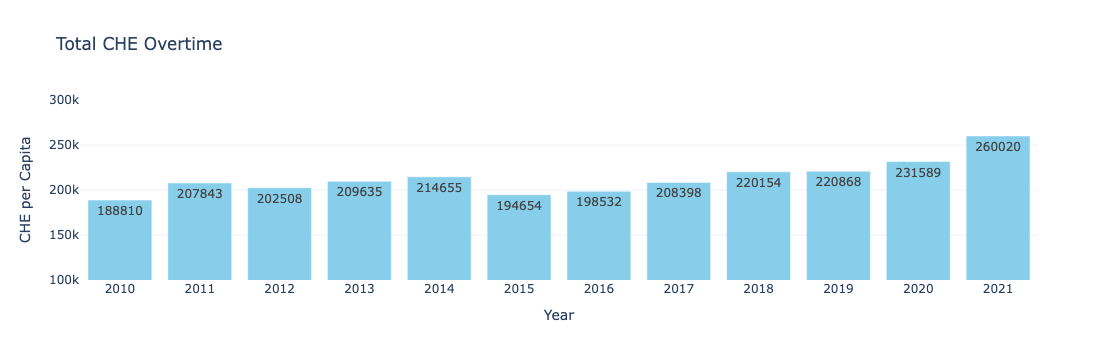

In [1229]:
fig = go.Figure()

# Add bar trace for CHE
fig.add_trace(go.Bar(
    x=pivot_total_che['Year'],
    y=pivot_total_che['CHE per Capita'],
    name='Total CHE Overtime',
    marker_color='skyblue',
    text=pivot_total_che['CHE per Capita'],  # Add data labels for CHE
    textposition='auto'  # Automatically position the text
))
# Update layout for better visualization
fig.update_layout(
    title='Total CHE Overtime',
    xaxis_title='Year',
    yaxis_title='CHE per Capita',
    barmode='group',  # Group bars together
    yaxis=dict(range=[100000, 300000]),
    template='plotly_white',  # Optional: change the template for styling
    xaxis=dict(
        tickvals=pivot_total_hle['Year'],  # Set tick positions to correspond to each country
        ticktext=pivot_total_hle['Year'])   # Use country names as tick labels
)

# Show the plot
fig.show()

## Top CHE Countries

In [1057]:
# analyzing top CHE countries
top_countries_che = combined_df.groupby('Country')['CHE per Capita'].sum().nlargest(10).index

In [1058]:
print(top_countries_che)

Index(['United States of America', 'Switzerland', 'Norway', 'Monaco',
       'Luxembourg', 'Denmark', 'Sweden', 'Australia',
       'Netherlands (Kingdom of the)', 'Ireland'],
      dtype='object', name='Country')


In [1059]:
df_cle_top = combined_df[combined_df['Country'].isin(top_countries_che)]

In [1060]:
pivot_che_df = df_cle_top.pivot(index='Year', columns='Country', values='CHE per Capita')

/var/folders/4x/r11_vgpj4glbxvp5rrk49znc0000gn/T/ipykernel_4967/638035257.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(pivot_che_df.columns))  # 'tab10' is a color palette with distinct colors


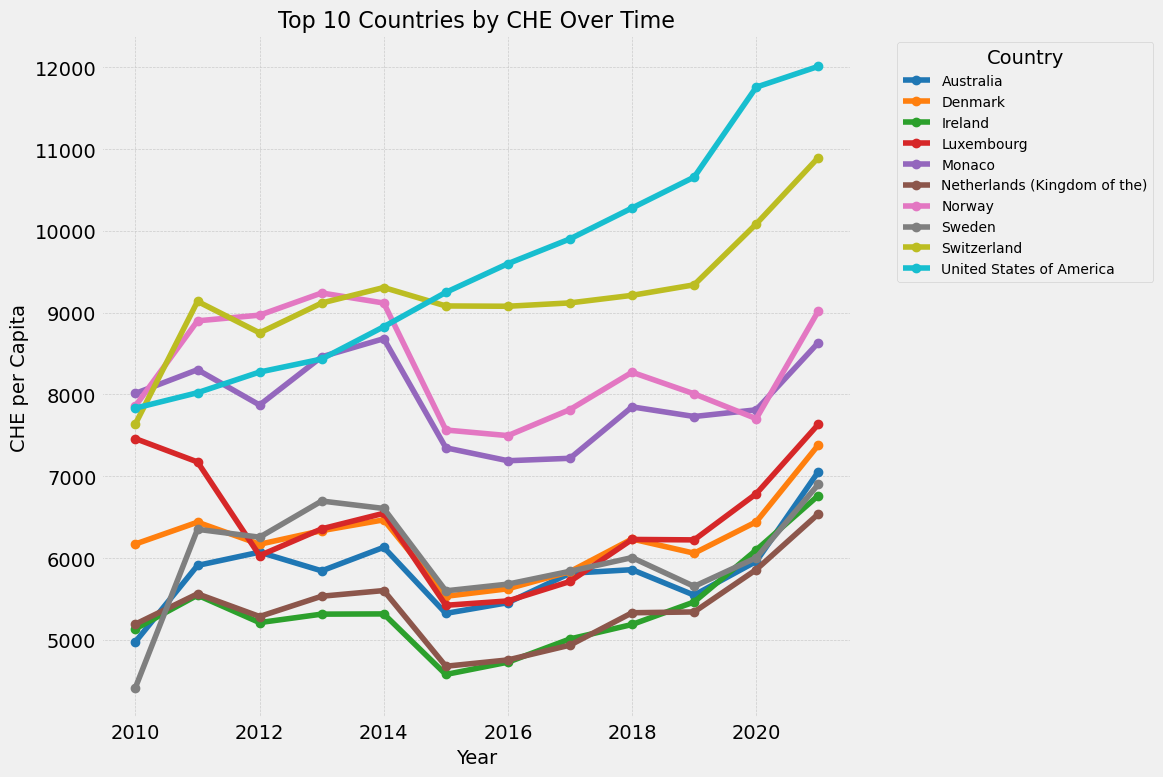

In [1123]:
plt.figure(figsize=(12, 8))

# Get a colormap and set the number of colors to match the number of countries
cmap = cm.get_cmap('tab10', len(pivot_che_df.columns))  # 'tab10' is a color palette with distinct colors

# Plot each country with a unique color
for i, country in enumerate(pivot_che_df.columns):
    plt.plot(pivot_che_df.index, pivot_che_df[country], marker='o', label=country, color=cmap(i))

# Title and Axis Labels
plt.title('Top 10 Countries by CHE Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CHE per Capita', fontsize=14)

# Legend outside of the plot for clarity
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Add grid for readability
plt.grid(visible=True, linestyle='--', linewidth=0.5)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [1244]:
# top continents CHE overtime
pivot_continents_che = combined_df.pivot_table(index='Year', columns='Continent', values='CHE per Capita', aggfunc='sum', fill_value=0)
print(pivot_continents_che)

Continent   Africa  Americas  Eastern Mediterranean     Europe  \
Year                                                             
2010       5164.52  28941.70                8485.37  122378.38   
2011       5718.60  30975.28                9319.40  133948.87   
2012       5806.49  32144.85                9507.90  126773.91   
2013       5955.21  33157.47               10002.26  132430.01   
2014       6083.78  33684.36               10648.77  135072.59   
2015       5456.62  33736.86               10542.81  117632.60   
2016       5418.04  34117.23               10401.70  119621.43   
2017       5789.67  36154.44               10432.02  125471.70   
2018       6004.96  36983.20               10982.19  134646.96   
2019       5859.15  37537.18               11114.22  134182.35   
2020       5730.16  38665.95               11234.11  142542.65   
2021       6243.55  40485.57               11735.41  163224.70   

Continent  South-East Asia  Western Pacific  
Year                         

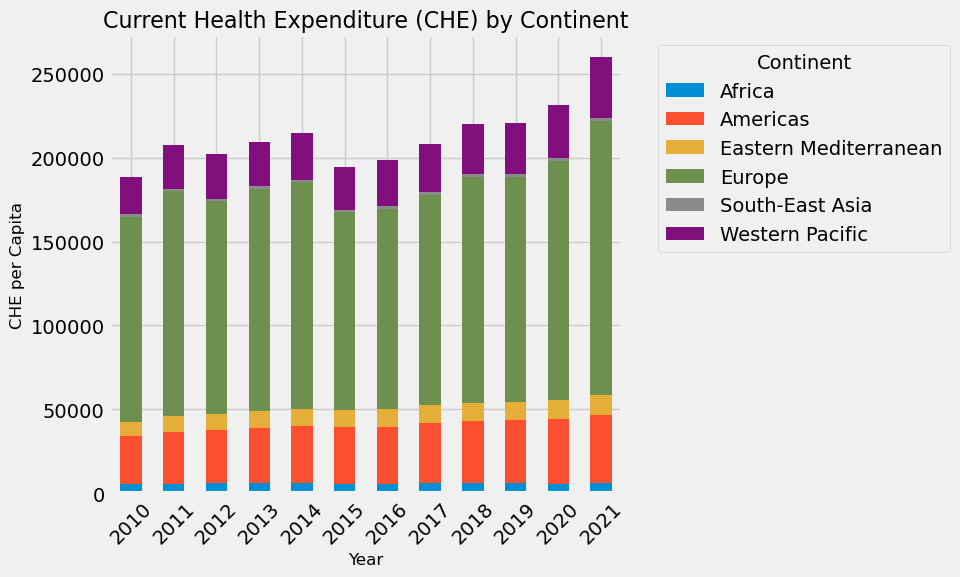

In [1254]:
# Plotting the pivot table as a stacked bar chart
pivot_continents_che.plot(kind='bar', stacked=True, figsize=(10, 6))

# Title and labels
plt.title('Current Health Expenditure (CHE) by Continent', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CHE per Capita', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Place the legend outside the graph
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')  

# Show the plot
plt.tight_layout()
# plt.legend(title='Continent')  # Add legend
plt.show()

### HLE Overtime

In [1155]:
# AVG HLE overtime 
pivot_total_hle = combined_df.pivot_table(index='Year', values='Avg HLE', aggfunc='mean').round().reset_index()
print("Pivoted DataFrame:\n", pivot_total_hle)

Pivoted DataFrame:
     Year  Avg HLE
0   2010     61.0
1   2011     62.0
2   2012     62.0
3   2013     62.0
4   2014     62.0
5   2015     62.0
6   2016     63.0
7   2017     63.0
8   2018     63.0
9   2019     63.0
10  2020     63.0
11  2021     62.0


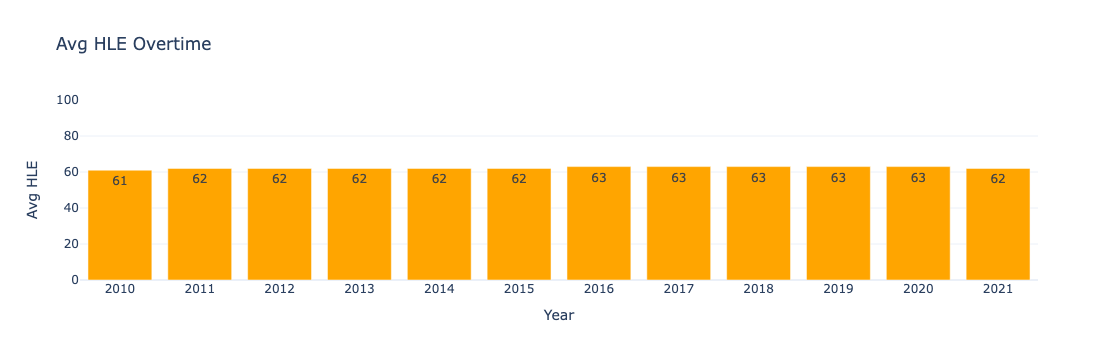

In [1193]:
fig = go.Figure()

# Add bar trace for HLE
fig.add_trace(go.Bar(
    x=pivot_total_hle['Year'],
    y=pivot_total_hle['Avg HLE'],
    name='Avg HLE',
    marker_color='orange',
    text=pivot_total_hle['Avg HLE'],  # Add data labels for CHE
    textposition='auto'  # Automatically position the text
))


# Update layout for better visualization
fig.update_layout(
    title='Avg HLE Overtime',
    xaxis_title='Year',
    yaxis_title='Avg HLE',
    barmode='group',  # Group bars together
    yaxis=dict(range=[0, 100]),
    template='plotly_white',  # Optional: change the template for styling
    xaxis=dict(
        tickvals=pivot_total_hle['Year'],  # Set tick positions to correspond to each country
        ticktext=pivot_total_hle['Year'])   # Use country names as tick labels
)

# Show the plot
fig.show()

In [1065]:
top_countries_hle = combined_df.groupby('Country')['Avg HLE'].avg().nlargest(10).index

In [1066]:
print(top_countries_hle)

Index(['Japan', 'Singapore', 'Republic of Korea', 'Iceland', 'Spain', 'Israel',
       'Luxembourg', 'Switzerland', 'Italy', 'Sweden'],
      dtype='object', name='Country')


In [1067]:
df_hle_top = combined_df[combined_df['Country'].isin(top_countries_hle)]

In [1068]:
pivot_hle_df = df_hle_top.pivot(index='Year', columns='Country', values='Avg HLE')

/var/folders/4x/r11_vgpj4glbxvp5rrk49znc0000gn/T/ipykernel_4967/2916351137.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(pivot_hle_df.columns))  # 'tab10' is a color palette with distinct colors


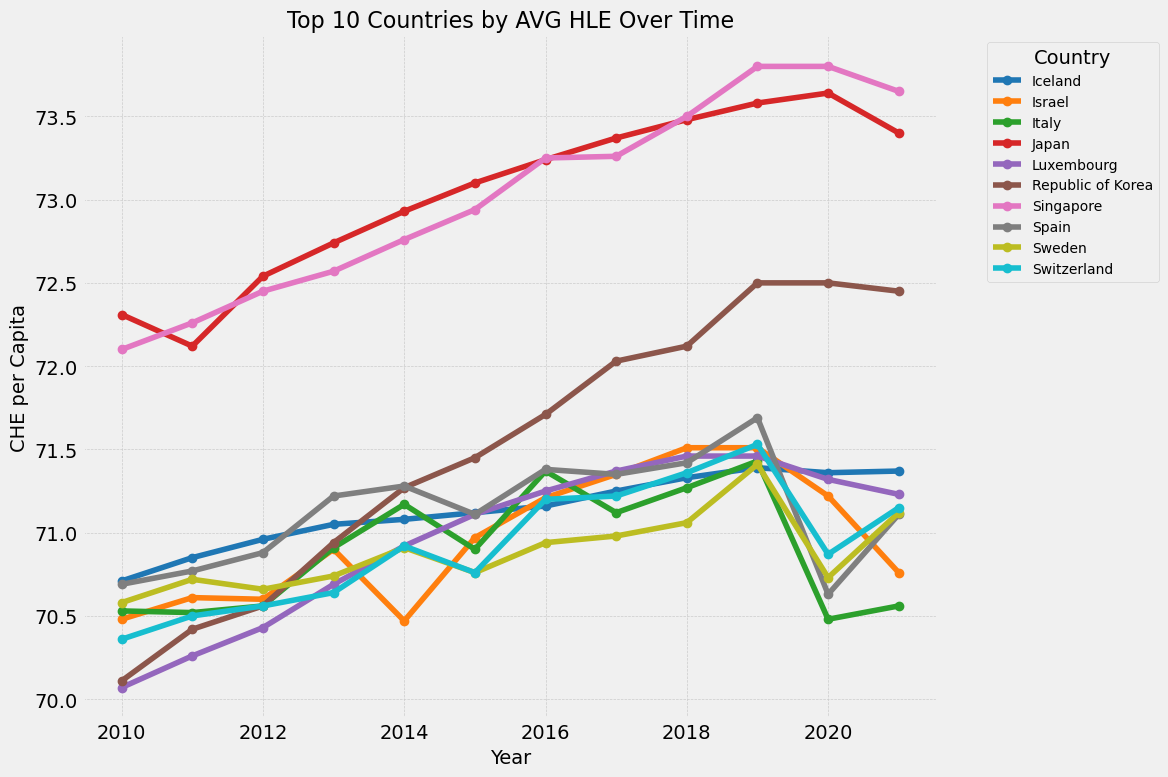

In [1069]:
plt.figure(figsize=(12, 8))

# Get a colormap and set the number of colors to match the number of countries
cmap = cm.get_cmap('tab10', len(pivot_hle_df.columns))  # 'tab10' is a color palette with distinct colors

# Plot each country with a unique color
for i, country in enumerate(pivot_hle_df.columns):
    plt.plot(pivot_hle_df.index, pivot_hle_df[country], marker='o', label=country, color=cmap(i))

# Title and Axis Labels
plt.title('Top 10 Countries by AVG HLE Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CHE per Capita', fontsize=14)

# Legend outside of the plot for clarity
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Add grid for readability
plt.grid(visible=True, linestyle='--', linewidth=0.5)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [1256]:
# top continents HLE overtime
pivot_continents_hle = combined_df.pivot_table(index='Year', columns='Continent', values='Avg HLE', aggfunc='mean', fill_value=0)
print(pivot_continents_hle)

Continent     Africa   Americas  Eastern Mediterranean    Europe  \
Year                                                               
2010       52.535870  63.983939              62.402000  66.34898   
2011       53.024130  64.684242              62.454500  66.63920   
2012       53.505652  64.803939              62.384211  66.83100   
2013       53.928696  64.864848              62.942222  67.12320   
2014       54.192391  64.896061              63.043889  67.29840   
2015       54.594565  64.916364              63.143333  67.37600   
2016       55.008696  64.933939              63.608235  67.59540   
2017       55.241915  65.066364              63.812941  67.76940   
2018       55.537021  65.140606              64.047059  67.90200   
2019       55.822979  65.094848              64.172353  68.08120   
2020       55.767447  64.133333              62.921765  67.13020   
2021       55.243191  62.933636              62.162941  66.68120   

Continent  South-East Asia  Western Pacific  
Y

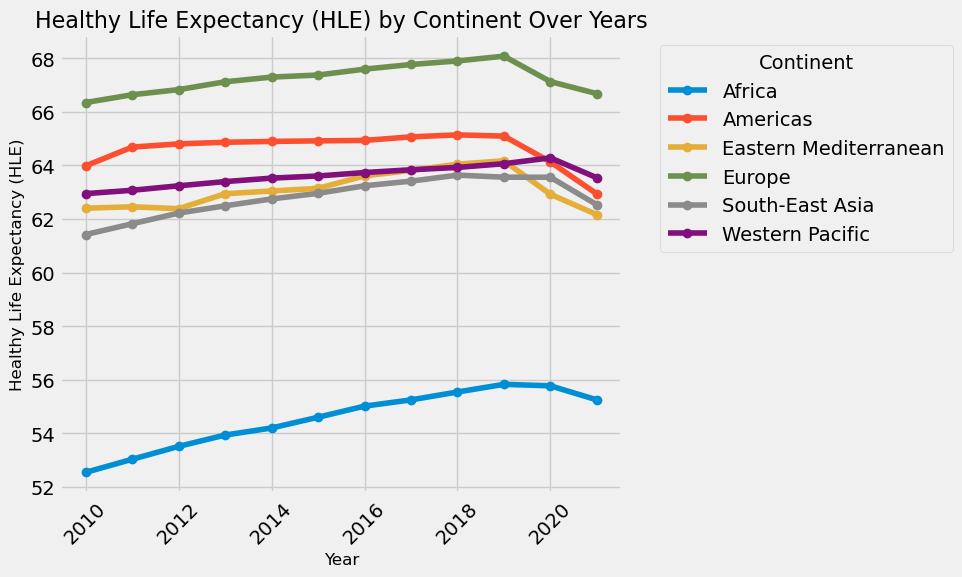

In [1272]:
import matplotlib.pyplot as plt

# Plotting the pivot table as a line graph
ax = pivot_continents_hle.plot(kind='line', marker='o', figsize=(10, 6))

# Title and labels
plt.title('Healthy Life Expectancy (HLE) by Continent Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Healthy Life Expectancy (HLE)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Set Y-axis range
# plt.ylim(50, 80)  # Adjust the range as needed

# Place the legend outside the graph
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust as necessary

# Show the plot
plt.tight_layout()
plt.show()